#### Описание проекта
* Вам предстоит подготовить проект для кредитного отдела банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Инструкция по выполнению
#### Задание 1. Проведите исследование
** Шаг 1. Откройте файл с данными datasets/data.csv и изучите общую информацию.

** Шаг 2. Предобработайте данные:
* определите и заполните пропущенные значения;

* замените вещественный тип данных на целочисленный;

* удалите дубликаты;

* выделите леммы в значениях столбца с целями получения кредита;

* категоризируйте данные.


#### Поясните:
* какие пропущенные значения вы обнаружили;
* возможные причины появления пропусков в данных;
* по какому принципу заполнены пропуски;
* какой метод вы использовали для поиска и удаления дубликатов и почему;
* возможные причины появления дубликатов в данных;
* какой метод вы использовали для изменения типа данных и почему;
* опишите, как вы проводили лемматизацию целей кредита;
* какие "словари" вы выделили для этого набора данных и почему;


#### Задание 2. Опишите свои выводы

** Шаг 1. Ответьте на вопросы:
* Есть ли зависимость между наличием детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?
Ответы сопроводите интерпретацией: поясните, о чём именно говорит полученный вами результат.

** Шаг 2. Напишите общий вывод.

Оформление:
Задание 2 представьте в виде связного текста в конце вашего Jupyter Notebook проекта, в ячейке типа markdown. Примените форматирование и заголовки.

____________________

#### Описание данных
* children — количество детей в семье
* days_employed — трудовой стаж в днях
* dob_days — возраст клиента в годах
* education — образование клиента
* education_id — идентификатор образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — доход в месяц
* purpose — цель получения кредита

______________________

----------

## Комментарий от наставника

Привет! Спасибо, что вовремя сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в подобных ячейках. Пострайся учесть эти комментарии в ходе выполнения дальнейших проектов.


---------

In [1]:
import pandas as pd
import numpy as np
from pymystem3 import Mystem
from collections import Counter

## Шаг 1. Откройте файл и изучите информацию
----

In [2]:
df = pd.read_csv('/datasets/data.csv')

In [3]:
df.head(20)

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


#### Посмотрим на типы переменных в датафрейме

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_days            21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


----------

## Комментарий от наставника

C __Шагом 1__ ты справился отлично, но с моей стороны следующий комментарий - было бы гораздо удобнее, если бы ты помимо Содержания в начале ноутбука добавлял Markdown-блоки перед соответствующими разделами. Так будет проще и тебе и наставнику во время проверки. Сразу пример:

## Шаг 2. Предобработайте данные:

---------

----------

## Комментарий от наставника

Супер! Всё стало намного понятнее. Также для создания удобного содержания в ноутбуке можешь попробовать описанный здесь подход
https://sebastianraschka.com/Articles/2014_ipython_internal_links.html 

---------

### Найдем долю пропущенных значений по столбцам от общего количество значений в столбце

In [5]:
df.isnull().sum()/df.shape[0]

children            0.000000
days_employed       0.100999
dob_days            0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

-----

## Заполнение NaN в days_employed

#### Есть пропущенные значения, необходимо заполнить
* days_employed (обычно трудовой стаж коррелирует с возрастом, чтобы не проводить более сложных агрегаций для рассчета nan значений, заполним его исходя из возраста, для этого необходимо разделить возраст на корзины, возьмем для примера небольшое количество корзин - [min-20], [21-40], [41-60], [61-max]

* Считал корреляцию, чтобы понимать с какой фичей есть наибольшая взаимосвязь. Т.е. от чего отталкиваться при заполнении пропущенных значений.


In [6]:
# Видим, что действительно days_employed имеет наибольшую корреляцию с dob_days
df.corr()

,children,days_employed,dob_days,education_id,family_status_id,debt,total_income
children,1.000000,-0.138354,-0.174358,-0.012695,-0.091284,0.018470,0.018220
days_employed,-0.138354,1.000000,0.582643,0.080565,0.005726,-0.047110,-0.136648
dob_days,-0.174358,0.582643,1.000000,0.067467,-0.069988,-0.069620,-0.052911
education_id,-0.012695,0.080565,0.067467,1.000000,0.007876,0.052906,-0.178885
family_status_id,-0.091284,0.005726,-0.069988,0.007876,1.000000,0.020611,-0.009147
debt,0.018470,-0.047110,-0.069620,0.052906,0.020611,1.000000,-0.012475
total_income,0.018220,-0.136648,-0.052911,-0.178885,-0.009147,-0.012475,1.000000


----------

## Комментарий от наставника

Спасибо за объяснение - молодец, что использовал такой подход, но на мой взгляд в данном случае можно было бы ограничиться знанием о том, что кол-во пропусков одинаковое для этих двух столбцов :)

---------

In [7]:
import matplotlib
df.dob_days.hist(bins=100)

In [39]:
# В данных есть люди с указанным возрастом 0
df.groupby('dob_days').count().iloc[:,:1].reset_index().rename(columns={'dob_days':'age', 'children':'count'}).head()

,age,count
0,0,101
1,19,14
2,20,51
3,21,111
4,22,183


#### Применим pd.cut чтобы разделить непрырвное значения возраста на категориальное, выбрал этот способ, тк это готовый метод pandas и нет необходимости писать ифы + скорость.

In [8]:
df['dob_days_bins'] = pd.cut(df['dob_days'], bins=[0,20,40,60,100],\
   labels=['молодые','средние','средние_плюс','пенсионеры'])

In [9]:
df.query('dob_days == 21').head()

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins
23,0,-272.981385,21,высшее,0,гражданский брак,1,M,сотрудник,0,128265.720871,сыграть свадьбу,средние
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью,средние
219,0,-597.273402,21,неоконченное высшее,2,гражданский брак,1,F,компаньон,0,86954.922465,операции с коммерческой недвижимостью,средние
317,0,NaN,21,высшее,0,Не женат / не замужем,4,M,сотрудник,0,NaN,сделка с автомобилем,средние
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья,средние


#### days_employed не может быть отрицательным значением, скорее всего была ошибка в выгрузке, исправим это и сразу переведем в int()

In [10]:
df['days_employed'] = df.days_employed.apply(lambda x: int(x*(-1)) if x < 0 else int(x) if x > 0 else x)

----------

## Комментарий от наставника

Отлично, что ты понимаешь, как работает метод apply, но я бы не советовал делать преобразования типов таким образом, а разбил это на 2 разные операции. Избавиться от отрицательных значений можно проще

---------

In [ ]:
# Вариант 1
df['days_employed'] = df['days_employed'].abs()

In [ ]:
# Вариант 2 (Если у тебя другая логика преобразований)
df.loc[df['days_employed']<0, 'days_employed'] = -df['days_employed']
# Также можно пользоваться некоторыми функциями numpy, например np.where, np.logical* (но в данном случае это избыточно)

In [11]:
df.head()

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins
0,1,8437.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,средние_плюс
1,1,4024.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,средние
2,0,5623.0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,средние
3,3,4124.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,средние
4,0,340266.0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,средние_плюс


#### Посмотрим, сколько людей получилось в группах dob_days_bins. 
#### На основе рассчитанной медианы по возрасту в этих группах мы будем заполнять NaN значения в ячейках days_employed

In [12]:
df.query('days_employed == "NaN"')['dob_days_bins'].value_counts()

средние_плюс    1011
средние          924
пенсионеры       223
молодые            6
Name: dob_days_bins, dtype: int64

#### Проверим данные на корректность. На гистограммах мы видим выбросы, получается что использовать среднее нельзя.

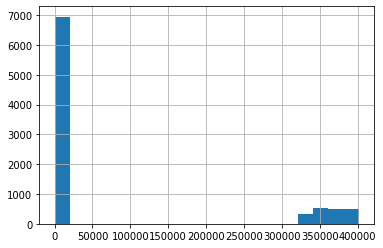

In [13]:
df.query('dob_days_bins == "средние_плюс"')['days_employed'].hist(bins=20)

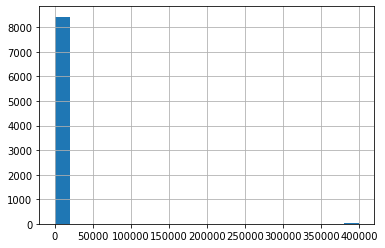

In [14]:
df.query('dob_days_bins == "средние"')['days_employed'].hist(bins=20)

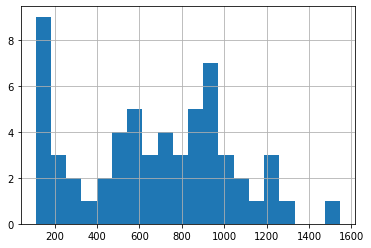

In [15]:
df.query('dob_days_bins == "молодые"')['days_employed'].hist(bins=20)

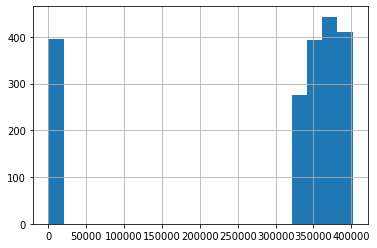

In [47]:
df.query('dob_days_bins == "пенсионеры"')['days_employed'].hist(bins=20)

#### На гистограммах мы видим, что вероятно некорректные значения пристутствуют во всех корзинах, кроме категории 'молодые'

#### Посчитаем медиану в каждой группе.
* Медианный стаж пенсионеров превышает 1000 лет, конечно такого не может быть

In [16]:
df.query('days_employed != "NaN"').\
    groupby('dob_days_bins').agg({'days_employed':'median'}).\
    reset_index().rename(columns={'days_employed':'median_days_employed'})

,dob_days_bins,median_days_employed
0,молодые,695.0
1,средние,1345.0
2,средние_плюс,3047.0
3,пенсионеры,356191.0



### Несколько путей решения проблемы с пропусками
* Выкинуть эти данные
* Выявить в этой группе данные не противоречащие логике и взять из них медиану/среднее и заменить некорректные значения на медиану/среднее
* Понять причину ошибки, тк данные по этой фиче были представлены во float, можно допустить что ошибка была в разрядности чисел

### Так же мы видим еще одну проблему
* Стаж не может превышать значения = (возраст-18)*365
* В этом случае я предлагаю создать дополнительную проверку на корректность значений.

### Подготовим дополнительный параметр для рассчета медианы, для заполнения NaN значений.
* Считать медиану стажа для заполнения NaN значениями мы будем только по корректному возрасту.

In [17]:
df['correct_days_employed'] = df.\
    apply(lambda x: 1 if ((x.days_employed != "NaN") and (x.days_employed <= (x.dob_days-18)*365)) else 0, axis=1 )

In [18]:
#теперь найдем и сохраним медианные значения по корректным данные в группам в словарь, чтобы произвести замену
sl = df.query('days_employed != "NaN" & correct_days_employed == 1').groupby('dob_days_bins').\
    agg({'days_employed':'median'}).to_dict()['days_employed']

#### Полученные медианные значения гораздо больше похожи на корректные данные

In [19]:
sl

{'молодые': 322.0,
 'средние': 1293.5,
 'средние_плюс': 2103.0,
 'пенсионеры': 2607.0}

#### Наконец заменим NaN значения в days_employed на медианные значения, рассчитанные выше

In [20]:
#найдем по маске NaN'ы и заменим их на медианное значение в этих группах.
mask = df['days_employed'].isin(['NaN','nan'])
df.loc[mask, 'days_employed'] = df.loc[mask, 'dob_days_bins'].map(sl)

#### Проверим, заменили ли мы все NaN значения в days_employed 
* У нас осталось 10 NaN, посмотрим что я забыл учесть

In [21]:
df.isnull().sum()

children                    0
days_employed              10
dob_days                    0
education                   0
education_id                0
family_status               0
family_status_id            0
gender                      0
income_type                 0
debt                        0
total_income             2174
purpose                     0
dob_days_bins             101
correct_days_employed       0
dtype: int64

#### Как видим это вектора у которых не указаны: возраст (0), трудовой стаж и доход в месяц. 
#### Тк слишком много неуказанных данных, удалим их из основного датафрейма, но на всякий случай сохраним в другом дф.

In [22]:
df_too_much_NaN = df.query('days_employed == "NaN"')
df = df.query('days_employed != "NaN"')

In [23]:
df_too_much_NaN

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins,correct_days_employed
1890,0,NaN,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,NaN,жилье,NaN,0
2284,0,NaN,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,NaN,недвижимость,NaN,0
4064,1,NaN,0,среднее,1,гражданский брак,1,M,компаньон,0,NaN,ремонт жилью,NaN,0
5014,0,NaN,0,среднее,1,женат / замужем,0,F,компаньон,0,NaN,покупка недвижимости,NaN,0
6411,0,NaN,0,высшее,0,гражданский брак,1,F,пенсионер,0,NaN,свадьба,NaN,0
6670,0,NaN,0,Высшее,0,в разводе,3,F,пенсионер,0,NaN,покупка жилой недвижимости,NaN,0
8574,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,недвижимость,NaN,0
12403,3,NaN,0,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,операции с коммерческой недвижимостью,NaN,0
13741,0,NaN,0,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,на проведение свадьбы,NaN,0
19829,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье,NaN,0


----------

## Комментарий от наставника

Ты обратил внимание, какой пол у большинства людей, не указавших возраст?

---------

## Готово. Проверим что теперь в days_employed не осталось пустых значений

In [24]:
df.isnull().sum()

children                    0
days_employed               0
dob_days                    0
education                   0
education_id                0
family_status               0
family_status_id            0
gender                      0
income_type                 0
debt                        0
total_income             2164
purpose                     0
dob_days_bins              91
correct_days_employed       0
dtype: int64

## Отлично, но остается проблема с предельными некорректными значениями внутри групп (что видно на гистограммах вверху).

In [25]:
df.groupby('dob_days_bins').agg({'days_employed':'median'})

,days_employed
dob_days_bins,
молодые,632.0
средние,1293.5
средние_плюс,2538.5
пенсионеры,350646.0


### Заменим некорректные значения так же на рассчитанные медианы внутри групп. Воспользуемся уже готовым словарем

In [26]:
sl

{'молодые': 322.0,
 'средние': 1293.5,
 'средние_плюс': 2103.0,
 'пенсионеры': 2607.0}

In [27]:
sl_keys = list(sl.keys())

In [28]:
df['days_employed'] = df.\
    apply(lambda x: sl[x.dob_days_bins] if ((x.days_employed != "NaN") 
    and (x.days_employed > (x.dob_days-18)*365) and (x.dob_days_bins in sl_keys )) else x.days_employed, axis=1 )

### Теперь похоже на правду. С days_employed покончено.

In [29]:
df.groupby('dob_days_bins').agg({'days_employed':'median'})

,days_employed
dob_days_bins,
молодые,322.0
средние,1293.5
средние_плюс,2103.0
пенсионеры,2607.0


In [30]:
df.isnull().sum()

children                    0
days_employed               0
dob_days                    0
education                   0
education_id                0
family_status               0
family_status_id            0
gender                      0
income_type                 0
debt                        0
total_income             2164
purpose                     0
dob_days_bins              91
correct_days_employed       0
dtype: int64

---
---
---

## Замена пропущенных значений в колонке total_income

In [31]:
df.query('total_income == "NaN"').head()

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins,correct_days_employed
12,0,2607.0,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу,пенсионеры,0
26,0,2103.0,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование,средние_плюс,0
29,0,2607.0,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости,пенсионеры,0
41,0,2103.0,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем,средние_плюс,0
55,0,2103.0,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу,средние_плюс,0


### Проверим гипотезу что зарплата не указана, потому что это безработные люди
*Те можем ли мы указать 0 вместо NaN

In [32]:
df.query('total_income == "NaN"').\
    groupby('income_type').agg({'children':'count'}).reset_index().rename(columns={'children':'count'})

,income_type,count
0,госслужащий,147
1,компаньон,506
2,пенсионер,410
3,предприниматель,1
4,сотрудник,1100


### Как видим, среди тех кто не указал зарплату нет безработных, мы не можем заменить NaN на 0

* Возможно опять стоит заменить на медиану. Посмотрим на медианную зарплату по категориям      

In [33]:
df.groupby('income_type').agg({'total_income':'median'})

,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,150447.935283
компаньон,172357.950966
пенсионер,118514.486412
предприниматель,499163.144947
сотрудник,142594.396847
студент,98201.625314


### Получается довольно высокие медианные зарплаты, даже у студентов, гипотезы почему так:
1. Люди могли намеренно завышать зарплату, чтобы им выдали кредит;
2. У нас нет уверенности, что данные представлены именно в рублях, а не баттах и прочих валютах;
3. Неправильная выгрузка;

### Варианты решения проблемы:
1. Мы не можем точно сказать, что пенсионеры не могут получать зарплату, потому что в датафрейме фича называется total_income, те совокупный доход, который может быть у студентов и незанятых людей.
2. И так же мы не можем так просто проверить "корректность" зарплаты, как это было с трудовым стажем. 
3. Поэтому NaN значения я просто заменю на медианное значение по типу занятости.

### Для замены NaN значений в total_income мы возьмем опять же медиану по групам типов занятости income_type

In [34]:
df.head()

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins,correct_days_employed
0,1,8437.0,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,средние_плюс,1
1,1,4024.0,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,средние,1
2,0,1293.5,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,средние,0
3,3,4124.0,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,средние,1
4,0,2103.0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,средние_плюс,0


In [35]:
df['total_income']= df.groupby("income_type")['total_income'].\
    transform(lambda x: x.fillna(x.median()))

### Готово. Пропущенные значения остались только во вспомогательной фиче dob_days_bins, которую использовали для заполнения days_employed
* Т.к. этих значений 4% от общего количества, мы их дропнем, но вначале посмотрим почему вспомогательная фича вернула нам NaN

In [36]:
df.isnull().sum()/df.shape[0]

children                 0.00000
days_employed            0.00000
dob_days                 0.00000
education                0.00000
education_id             0.00000
family_status            0.00000
family_status_id         0.00000
gender                   0.00000
income_type              0.00000
debt                     0.00000
total_income             0.00000
purpose                  0.00000
dob_days_bins            0.00423
correct_days_employed    0.00000
dtype: float64

In [37]:
list(df.dob_days_bins.unique())

['средние_плюс', 'средние', 'пенсионеры', 'молодые', nan]

### Как видим у этих векторов нет возраста, поэтому мы не смогли их разделить на корзины.

In [38]:


df.query('dob_days_bins != "средние_плюс" & dob_days_bins != \
    "средние" & dob_days_bins != "пенсионеры" & dob_days_bins != "молодые" ').head()

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins,correct_days_employed
99,0,346541.0,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль,NaN,0
149,0,2664.0,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем,NaN,0
270,3,1872.0,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью,NaN,0
578,0,397856.0,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости,NaN,0
1040,0,1158.0,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль,NaN,0


In [39]:
df = df.dropna().reset_index(drop=True)

In [40]:
df.isnull().sum()

children                 0
days_employed            0
dob_days                 0
education                0
education_id             0
family_status            0
family_status_id         0
gender                   0
income_type              0
debt                     0
total_income             0
purpose                  0
dob_days_bins            0
correct_days_employed    0
dtype: int64

## Готово. С пропусками в данных покончено.

----
----
----

## Замените вещественный тип данных на целочисленный;
* Пройдемся по датафрейму и заменим значения float64 на int, о чем указано в условии задания


In [41]:
for i in df.select_dtypes(include='float64'):
    df[i] = df[i].astype('int')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21424 entries, 0 to 21423
Data columns (total 14 columns):
children                 21424 non-null int64
days_employed            21424 non-null int64
dob_days                 21424 non-null int64
education                21424 non-null object
education_id             21424 non-null int64
family_status            21424 non-null object
family_status_id         21424 non-null int64
gender                   21424 non-null object
income_type              21424 non-null object
debt                     21424 non-null int64
total_income             21424 non-null int64
purpose                  21424 non-null object
dob_days_bins            21424 non-null category
correct_days_employed    21424 non-null int64
dtypes: category(1), int64(8), object(5)
memory usage: 2.1+ MB


----------

## Комментарий от наставника

Обрати внимание - те столбцы, которые ты создавал с помощью функции qcut, имеют тип category - часто бывает полезно преобразовать все категориальные столбцы в этот тип данных - это уменьшает занимаемое датафреймом место в памяти и ускоряет расчеты.

---------

### Готово. В датафрейме не осталось столбцов с данными float64.

---

## Приведем категориальные данные в столбце education к одному виду.

In [43]:
df.education.unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [44]:
#заменим все значения в колонке education на нижний регистр
df.education = df.education.str.lower()

In [45]:
df.education.unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

## Приведем family_status к одному виду.

In [46]:
df.family_status = df.family_status.str.lower()

## Посмотрим, остались ли еще где-то категориальные данные разного вида/регистра

In [47]:
for i in df.select_dtypes(include='object'):
    print()
    print('Уникальные значения в колонке:',i)
    print(df[i].unique())


Уникальные значения в колонке: education
['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']

Уникальные значения в колонке: family_status
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']

Уникальные значения в колонке: gender
['F' 'M' 'XNA']

Уникальные значения в колонке: income_type
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']

Уникальные значения в колонке: purpose
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жил

## Удалим одну строку со значением XNA (NAN) в колонке gender

In [48]:
df.query('gender == "XNA"')

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins,correct_days_employed
10649,0,1293,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости,средние,0


In [49]:
df = df.drop(10649)

## Категоризируем total_income, разделим на корзины
* [0,20000,60000,100000,140000,180000,220000,260000,300000,9999999]

In [50]:
df['total_income_category'] = pd.\
    cut(df['total_income'], bins = [0,20000,60000,100000,140000,180000,220000,260000,300000,9999999],
    labels=['low','under_60k',
        'under_100k','under_140k','under_180k','under_220k','under_260k','under_300k','millioners'])          

In [51]:
df.head()

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins,correct_days_employed,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,средние_плюс,1,under_260k
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средние,1,under_140k
2,0,1293,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средние,0,under_180k
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,средние,1,under_300k
4,0,2103,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,средние_плюс,0,under_180k


----
----
----

# Задание 2. Опишите свои выводы.
----
### Шаг 1. Ответьте на вопросы:
1. Есть ли зависимость между наличием детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок? 
Ответы сопроводите интерпретацией: поясните, о чём именно говорит полученный вами результат.

---
---

## 4. Как разные цели кредита влияют на его возврат в срок?
* По нашим данным, наибольшая конверсия в просрочку у людей, которые указывают в качестве цели кредита - приобретение автомобиля.

----------

## Комментарий от наставника

Насколько я понимаю этот кусок попал сюда случайно :)

---------

In [53]:
unique_purpose = list(df.purpose.unique())

In [54]:
unique_purpose

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'сыграть свадьбу',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'операции с коммерческой недвижимостью',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'покупка жилья для сдачи',
 'на покупку автомобиля',
 'ремонт жилью',
 '

In [55]:
m = Mystem()
lemmas = m.lemmatize(str(unique_purpose))
print(Counter(lemmas))

Counter({' ': 59, "', '": 37, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, "['": 1, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, "']\n": 1})


### Выделим из полученного словаря верхние категории
* недвижимость/жилье -> недвижимость
* автомобиль
* свадьба
* образование


In [56]:
df['purpose_credit_category'] = df.purpose.apply(lambda x: 
            'операции с недвижимостью' if ('недвижимость' in m.lemmatize(str(x))) or 'жилье' in m.lemmatize(str(x))
            else 'автомобиль' if 'автомобиль' in m.lemmatize(str(x))
            else 'свадьба' if 'свадьба' in m.lemmatize(str(x))
            else 'образование' if 'образование' in m.lemmatize(str(x))
            else 'другое')

In [57]:
df.head()

,children,days_employed,dob_days,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_days_bins,correct_days_employed,total_income_category,purpose_credit_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,средние_плюс,1,under_260k,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,средние,1,under_140k,автомобиль
2,0,1293,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,средние,0,under_180k,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,средние,1,under_300k,образование
4,0,2103,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,средние_плюс,0,under_180k,свадьба


### Проверим что все категории правильно выделены из лемм и NaN значения отсутствуют.

In [58]:
df.purpose_credit_category.unique()

array(['операции с недвижимостью', 'автомобиль', 'образование', 'свадьба'],
      dtype=object)

In [59]:
df_purpose = df.pivot_table(index=['purpose_credit_category'], columns='debt', values='family_status_id', aggfunc='count').\
    reset_index()

In [60]:
df_purpose.columns =  ['purpose_credit_category','no_debt','yes_debt']
df_purpose

,purpose_credit_category,no_debt,yes_debt
0,автомобиль,3893,400
1,образование,3634,370
2,операции с недвижимостью,10013,779
3,свадьба,2150,184


### Посчитаем конверсию в задолженность по каждой группе

In [61]:
df_purpose['all_people'] = df_purpose['no_debt']+df_purpose['yes_debt']
df_purpose['converison_rate_in_debt'] = df_purpose['yes_debt']/df_purpose['all_people']
df_purpose

,purpose_credit_category,no_debt,yes_debt,all_people,converison_rate_in_debt
0,автомобиль,3893,400,4293,0.093175
1,образование,3634,370,4004,0.092408
2,операции с недвижимостью,10013,779,10792,0.072183
3,свадьба,2150,184,2334,0.078835


____________
----


## 1. Есть ли зависимость между наличием детей и возвратом кредита в срок?

* Исходя из наших данных, у людей с детьми больше просрочек по кредиту

In [63]:
#Добавим наличие детей для группировки
df['children_yes_or_no'] = np.where(df.children > 0, '1', '0')

In [64]:
deti = df.pivot_table(index=['children_yes_or_no'], columns='debt', values='family_status_id', aggfunc='count').\
    reset_index()

In [66]:
deti.columns = ['children_yes_or_no','no_debt','yes_debt']
deti['all_people'] = deti['yes_debt']+deti['no_debt']

### Посчитаем конверсию в задолженность по каждой группе

In [67]:
deti['conversion_rate_in_debt'] = deti['yes_debt']/deti['all_people']

In [68]:
deti

,children_yes_or_no,no_debt,yes_debt,all_people,conversion_rate_in_debt
0,0,13067,1059,14126,0.074968
1,1,6623,674,7297,0.092367


----
----

## 2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
* По нашим данным, люди в стутсе __не женат/не замужем__ имею просрочку чаще, чем остальные категории
* А вдовы, наоборот, имею меньше всего просрочек

In [69]:
family = df.pivot_table(index=['family_status'], columns='debt', values='family_status_id', aggfunc='count').\
    reset_index()

In [70]:
family.columns = ['family_status','no_debt','yes_debt']
family

,family_status,no_debt,yes_debt
0,в разводе,1100,85
1,вдовец / вдова,893,62
2,гражданский брак,3769,386
3,женат / замужем,11404,927
4,не женат / не замужем,2524,273


### Посчитаем конверсию в задолженность по каждой группе

In [71]:
family['all_people'] = family['no_debt']+family['yes_debt']
family['conversion_rate_in_debt'] = family['yes_debt']/family['all_people']

In [72]:
familyм

,family_status,no_debt,yes_debt,all_people,conversion_rate_in_debt
0,в разводе,1100,85,1185,0.071730
1,вдовец / вдова,893,62,955,0.064921
2,гражданский брак,3769,386,4155,0.092900
3,женат / замужем,11404,927,12331,0.075176
4,не женат / не замужем,2524,273,2797,0.097605


----------

## Комментарий от наставника

Ты пишешь выводы сразу после вопроса, в данном случае это нормально, но если цепочка исследования будет больше 5 ячеек, лучше делать это в конце. Также, когда ты делаешь выводы по итоговому получившемуся датафрейму, лучше находить категорию с самым большим отношением просрочек не глазами, а выводить датафрейм по убыванию этого столбца с помощью метода __sort_values__

---------

---
---

## 3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* По нашим данным, самая больша доля просрочки в группе under_180k
* Самая малая доля просрочки в группе under_60k

In [73]:
dohod = df.pivot_table(index=['total_income_category'], columns='debt', values='family_status_id', aggfunc='count').\
    reset_index()

In [74]:
dohod.columns =  ['total_income_category','no_debt','yes_debt']
dohod

,total_income_category,no_debt,yes_debt
0,under_60k,753,49
1,under_100k,3334,304
2,under_140k,4606,424
3,under_180k,5084,480
4,under_220k,2208,193
5,under_260k,1422,116
6,under_300k,910,61
7,millioners,1373,106


### Посчитаем конверсию в задолженность по каждой группе

In [76]:
dohod['all_people'] = dohod['no_debt']+dohod['yes_debt']
dohod['conversion_rate_in_debt'] = dohod['yes_debt']/dohod['all_people']

In [77]:
dohod

,total_income_category,no_debt,yes_debt,all,all_people,conversion_rate_in_debt
0,under_60k,753,49,802,802,0.061097
1,under_100k,3334,304,3638,3638,0.083562
2,under_140k,4606,424,5030,5030,0.084294
3,under_180k,5084,480,5564,5564,0.086269
4,under_220k,2208,193,2401,2401,0.080383
5,under_260k,1422,116,1538,1538,0.075423
6,under_300k,910,61,971,971,0.062822
7,millioners,1373,106,1479,1479,0.071670


_________________

----------

## Комментарий от наставника

Пётр, спасибо за проделанную работу! Мне очень понравилось. Не хватает, пожалуй, только итоговых выводов.

Мои итоговые комментарии далее:
1. Ты очень хорошо поработал с пропусками и аномальными значениями, с добавление содержания твоя логика стала гораздо понятнее
2. У тебя очень хороший инструментарий pandas - qcut, query (иногда избыточно), apply, transform, pivot_table - это похвально, есть из чего выбирать, когда делаешь анализ
3. Местами код избыточен, но я не буду делать замечания на этот счет - у тебя хорошее чутьё, и со временем ты будешь выбирать более эффективные/элегантные решения
4. Некоторые суждения субъективны (например трудовой стаж может быть с 14 лет, __как у меня, например :)__
5. Ты используешь не всегда понятные названия переменных (например sl)

---------